In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

In [127]:
def crosscorr(datax, datay, lag=1):   
    return(stats.pearsonr(datax[lag:], datay[:-lag]))

In [3]:
d = Dataset('../../../nc/GPCC_half.nc')

In [4]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn
    original_source: ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_download.html
    Conventions: CF 1.0
    dataset_title: Global Precipitation Climatology Centre (GPCC)
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.gpcc.html
    title: GPCC Full Data Reanalysis

In [162]:
level = 0.05
train_start = 1950
validation_end = 2015

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [163]:
# Using readlines()
file1 = open('ONI_1950_2015.txt', 'r')
Lines = file1.readlines()

NINO = []
for line in Lines:
    l = line.split()
    for i in range(1, len(l)):
        NINO.append(float(l[i]))
nino = np.array(NINO[11:])

In [164]:
d = []
for i in np.arange(11, 781, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

In [165]:
d = np.array(d)

In [166]:
nino_temp = nino[d]
result_temp = result[d,:]

In [167]:
corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(nino_temp, np.ravel(result_temp[:,j]),3)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [168]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [169]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,60,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

In [170]:
SON3 = deg.copy()

In [171]:
np.save("SON3.npy",deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


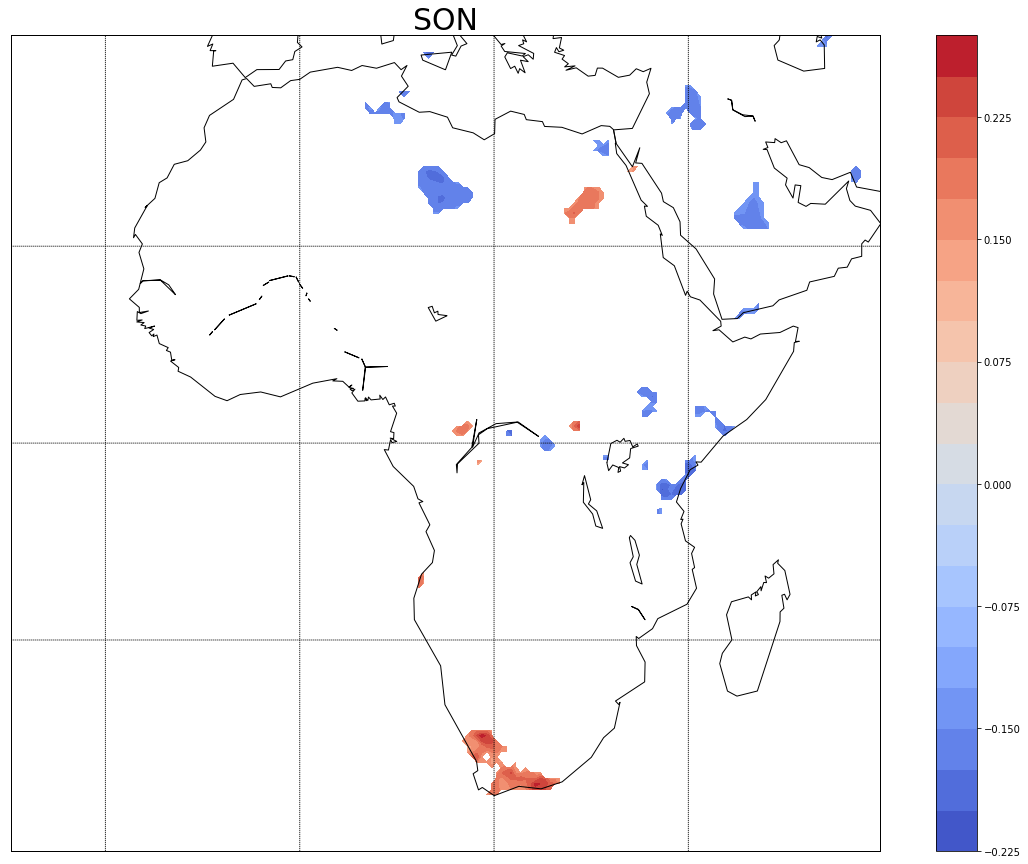

In [172]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

In [108]:
lon  = lon1
fontsize = 30

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


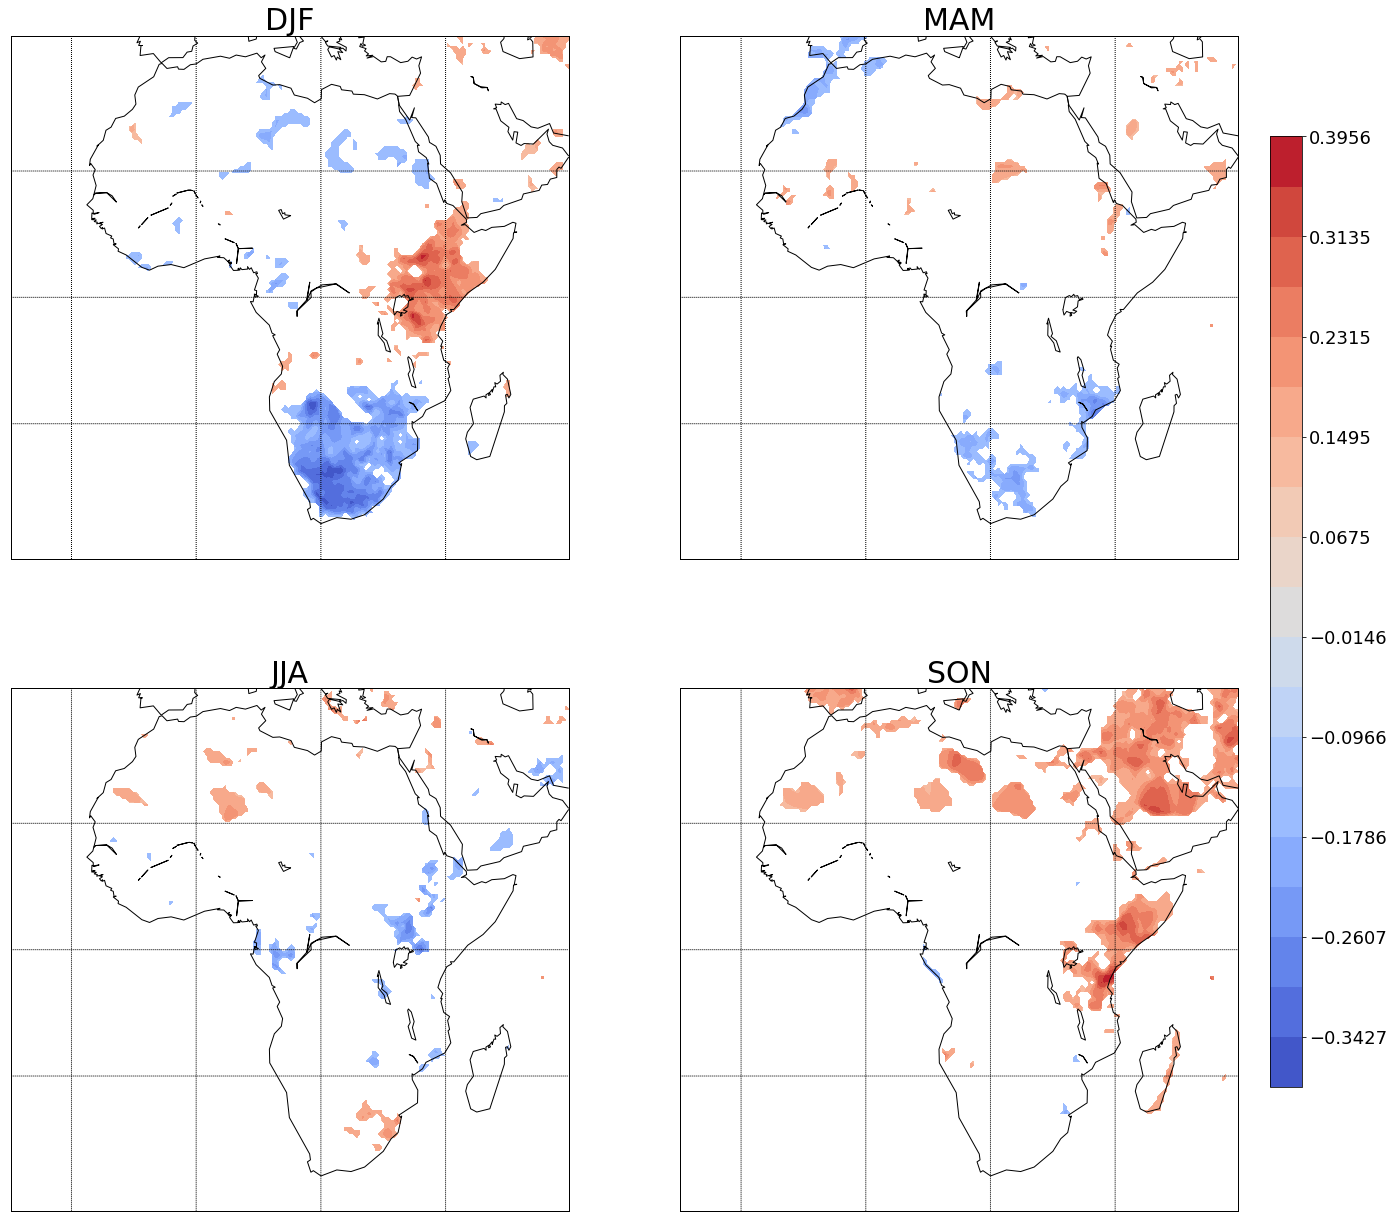

In [109]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ENSO_rainfall.png")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


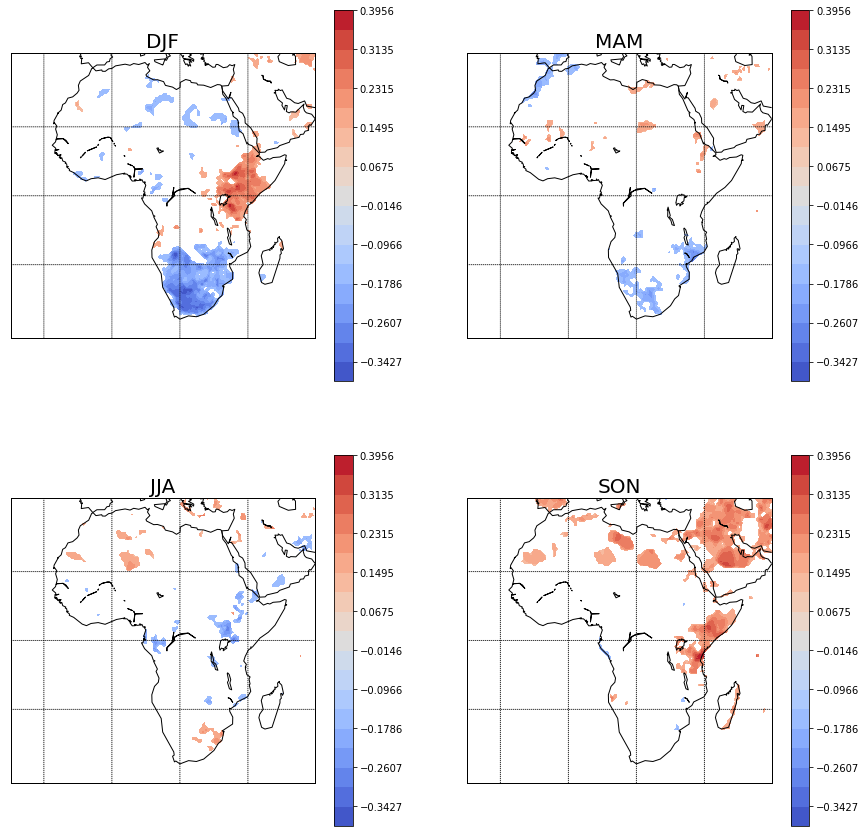

In [107]:
plt.rcParams['figure.figsize'] = (18,9)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
#fig.colorbar(cs, cax=cbar_ax)
fig.colorbar(cs)
plt.show()
fig.savefig("ENSO_rainfall1.png")